# Solana Price Prediction using LSTM Neural Network model

## 1. Import Library

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt


from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM


import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## 2. Load Dataset

In [ ]:
datasol = pd.read_csv('./sample_data/SOL-USD.csv')

In [ ]:
print('Data harian Solana:',datasol.shape[0])

Data harian Solana: 1419


In [ ]:
datasol.shape

(1419, 7)

In [ ]:
datasol

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...,...
1414,2024-02-23,101.674622,103.022835,98.958351,99.954697,99.954697,1483285120
1415,2024-02-24,99.954376,104.645393,98.585205,104.133522,104.133522,1083637514
1416,2024-02-25,104.132668,104.329941,102.171028,103.453491,103.453491,909662462
1417,2024-02-26,103.450706,110.580353,100.455200,109.918533,109.918533,2334408023


In [ ]:
datasol.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


In [ ]:
datasol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1419 non-null   object 
 1   Open       1419 non-null   float64
 2   High       1419 non-null   float64
 3   Low        1419 non-null   float64
 4   Close      1419 non-null   float64
 5   Adj Close  1419 non-null   float64
 6   Volume     1419 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 77.7+ KB


In [ ]:
datasol.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1.419000e+03
mean,47.412681,49.583444,45.290109,47.471393,47.471393,1.111113e+09
std,54.040680,56.339846,51.516704,54.006293,54.006293,1.396940e+09
min,0.513391,0.559759,0.505194,0.515273,0.515273,6.520200e+05
25%,13.411988,13.830729,12.826906,13.423570,13.423570,1.562178e+08
50%,26.254124,27.487616,24.792021,26.372353,26.372353,5.942149e+08
75%,61.449818,65.889938,58.964129,61.714787,61.714787,1.671670e+09
max,258.781555,260.062103,246.122421,258.934326,258.934326,1.706864e+10


### Checking for Null Values

In [ ]:
print('Null Values:',datasol.isnull().values.sum())

Null Values: 0


In [ ]:
datasol.shape

(1419, 7)

## 3. EDA (Explanatory Data Analysis)

In [ ]:
awal = datasol.iloc[0][0]
akhir = datasol.iloc[-1][0]

print('Tanggal Awal',awal)
print('Tanggal Akhir',akhir)

Tanggal Awal 2020-04-10
Tanggal Akhir 2024-02-27


<ipython-input-419-e28ddd4bf9dc>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-419-e28ddd4bf9dc>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### Analisa keseluruhan 2020-2024


In [ ]:
datasol['Date'] = pd.to_datetime(datasol['Date'], format='%Y-%m-%d')

allyeardata = datasol.loc[(datasol['Date'] >= '2020-04-10') & (datasol['Date'] <= '2024-02-27')]

allyeardata.drop(allyeardata[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2020-04-10,0.832005,1.313487,0.694187,0.951054
1,2020-04-11,0.951054,1.049073,0.765020,0.776819
2,2020-04-12,0.785448,0.956670,0.762426,0.882507
3,2020-04-13,0.890760,0.891603,0.773976,0.777832
4,2020-04-14,0.777832,0.796472,0.628169,0.661925
...,...,...,...,...,...
1414,2024-02-23,101.674622,103.022835,98.958351,99.954697
1415,2024-02-24,99.954376,104.645393,98.585205,104.133522
1416,2024-02-25,104.132668,104.329941,102.171028,103.453491
1417,2024-02-26,103.450706,110.580353,100.455200,109.918533


In [ ]:
bulanan= allyeardata.groupby(allyeardata['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
bulanan = bulanan.reindex(new_order, axis=0)
bulanan

,Open,Close
Date,,
January,62.767898,62.291366
February,58.753961,58.942984
March,42.599061,42.913644
April,43.842845,43.728060
May,30.582700,30.160317
June,22.593613,22.490609
July,23.231847,23.359198
August,30.673570,31.172810
September,51.538480,51.670086


In [ ]:
names = cycle(['Solana Open Price','Solana Close Price','Solana High Price','Solana Low Price'])

fig = px.line(allyeardata, x=allyeardata.Date, y=[allyeardata['Open'],allyeardata['Close'],allyeardata['High'], allyeardata['Low']],labels={'Date': 'Date','value':'Harga Solana'})
fig.update_layout(title_text='Grafik Solana 2020/04/10 - 2024/02/27', font_size=15, font_color='black',legend_title_text='Solana Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## 4. Building LSTM model

* First step is preparing Data for Training and Testing
* As we want to predict Close Price of Solana, we are just considering Close and Date.

In [ ]:
hargaclosing = datasol[['Date','Close']]
print("Shape of close dataframe:", hargaclosing.shape)

Shape of close dataframe: (1419, 2)


In [ ]:
fig = px.line(hargaclosing, x=hargaclosing.Date, y=hargaclosing.Close,labels={'date':'Date','close':'Close Solana'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Close Price Solana 2020-2024', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Range data yang digunakan


In [ ]:
hargaclosing = hargaclosing[hargaclosing['Date'] > '2023-02-27']
close_stock = hargaclosing.copy()
print("Total data for prediction: ",hargaclosing.shape[0])

Total data for prediction:  365


In [ ]:
hargaclosing

,Date,Close
1054,2023-02-28,21.916388
1055,2023-03-01,22.506432
1056,2023-03-02,21.984879
1057,2023-03-03,21.399353
1058,2023-03-04,20.966839
...,...,...
1414,2024-02-23,99.954697
1415,2024-02-24,104.133522
1416,2024-02-25,103.453491
1417,2024-02-26,109.918533


In [ ]:
fig = px.line(hargaclosing, x=hargaclosing.Date, y=hargaclosing.Close,labels={'date':'Date','close':'Close Solana'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='rentang waktu yang akan diprediksi', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Normalizing Data

* Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
* MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
del hargaclosing['Date']
scaler=MinMaxScaler(feature_range=(0,1))
hargaclosing=scaler.fit_transform(np.array(hargaclosing).reshape(-1,1))
print(hargaclosing.shape)


(365, 1)


In [ ]:
hargaclosing

array([[0.06965895],
       [0.07519097],
       [0.0703011 ],
       [0.06481144],
       [0.06075636],
       [0.06086648],
       [0.05764529],
       [0.05398618],
       [0.03688943],
       [0.02645395],
       [0.03522478],
       [0.03505789],
       [0.05460309],
       [0.05575798],
       [0.06039254],
       [0.0450442 ],
       [0.04916535],
       [0.06696548],
       [0.06290397],
       [0.0695372 ],
       [0.07209732],
       [0.07623948],
       [0.06557211],
       [0.07247529],
       [0.05805635],
       [0.05587924],
       [0.06083774],
       [0.05095733],
       [0.05610474],
       [0.06211234],
       [0.05685806],
       [0.06266577],
       [0.06083889],
       [0.05672614],
       [0.05584553],
       [0.06036054],
       [0.06074856],
       [0.05741199],
       [0.05609764],
       [0.0520334 ],
       [0.05449933],
       [0.05996429],
       [0.07999497],
       [0.08905629],
       [0.0932472 ],
       [0.09643878],
       [0.08993827],
       [0.101

### Split data train dan tes


In [ ]:
training_size=int(len(hargaclosing)*0.80)
test_size=len(hargaclosing)-training_size
datatrain,datates=hargaclosing[0:training_size,:],hargaclosing[training_size:len(hargaclosing),:1]
print("datatrain: ", datatrain.shape)
print("datates: ", datates.shape)

datatrain:  (292, 1)
datates:  (73, 1)


forecast


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(datatrain, time_step)
X_test, y_test = create_dataset(datates, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (276, 15)
y_train:  (276,)
X_test:  (57, 15)
y_test (57,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (276, 15, 1)
X_test:  (57, 15, 1)


### Model Building

In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="sigmoid"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="loss",verbose=2,mode='min',patience=5)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 10)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1,callbacks=[earlyStop])

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.1707 - val_loss: 0.9842
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0952 - val_loss: 0.7909
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0558 - val_loss: 0.6418
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0293 - val_loss: 0.5384
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - val_loss: 0.4746
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0187 - val_loss: 0.4396
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0172 - val_loss: 0.4272
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0188 - val_loss: 0.4258
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0177 - val_loss: 0.4290
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0156 - val_loss: 0.4300
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0148 - val_loss: 0.4272
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145 - val_loss: 0.4

### Plotting Loss vs Validation loss

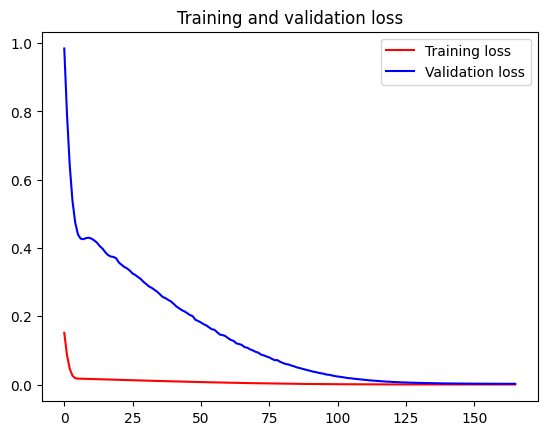

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### prediksi, check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


((276, 1), (57, 1))

## Model Evaluation

In [ ]:
# normalin data

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

* ### Evaluation metrices RMSE, MSE and MAE

In [ ]:
# Evaluation metrices MAE
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data MAE:  1.0679524198573016
-------------------------------------------------------------------------------------
Test data MAE:  4.209371750402617


In [ ]:
# Evaluation metrices RMSE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))

Train data RMSE:  1.7300198252538093
-------------------------------------------------------------------------------------
Test data RMSE:  5.072595972695809


In [ ]:
# Evaluation metrices MSE
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))

Train data MSE:  2.992968595771221
-------------------------------------------------------------------------------------
Test data MSE:  25.731229902209744


* ### Variance Regression Score

In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.985439873907455
Test data explained variance regression score: 0.6959297133131961


* ### R square score for regression

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9853791361080735
Test data R2 score: 0.5638857016079826


* ### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0025128090839236675
Test data MGD:  0.0025560722688298277
----------------------------------------------------------------------
Train data MPD:  0.07725777299303593
Test data MPD:  0.25595533226483247


## Comparision of original Solana close price and Predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(hargaclosing)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(hargaclosing)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(hargaclosing)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Harga asli','Harga prediksi train','Harga prediksi test'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Harga Solana','date': 'Waktu'})
fig.update_layout(title_text='Perbandingan harga asli dengan harga prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


### Predicting next 30 days

In [ ]:
x_input=datates[len(datates)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(hargaclosing[len(hargaclosing)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Harga 15 hari sebelumnya','Prediksi harga untuk 30 hari ke depan'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Solana price','index': 'Timestamp'})
fig.update_layout(title_text='Perbandingan harga 15 hari sebelumnya dengan 30 hari ke depan',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting entire Closing Solana Price with next 30 days period of prediction

In [ ]:
lstmdf=hargaclosing.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Solana price','index': 'Timestamp'})
fig.update_layout(title_text='Gabungan harga asli dengan harga prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Solana')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()